In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

Loading Datasets

In [11]:
train_dir = 'Aerial_Landscapes_split/train'
test_dir = 'Aerial_Landscapes_split/test'
DATADIR = '../Aerial_Landscapes'
CATEGORIES = os.listdir(train_dir)
IMG_SIZE=100

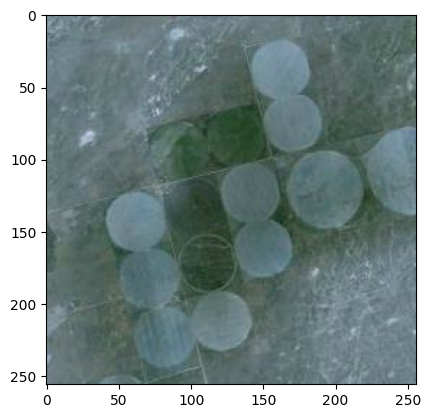

In [12]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [13]:
training_data=[]
testing_data=[]
def create_training_data():
    for category in CATEGORIES:
        path_train=os.path.join(train_dir, category)
        path_test=os.path.join(test_dir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path_train):
            try:
                img_array=cv2.imread(os.path.join(path_train,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        for img in os.listdir(path_test):
            try:
                img_array=cv2.imread(os.path.join(path_test,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [14]:
print(len(training_data), len(testing_data))

9600 2400


In [15]:
lenoftrain = len(training_data)
lenoftest = len(testing_data)

Preprocessing Data

In [19]:
X_train=[]
y_train=[]

for categories, label in training_data:
    X_train.append(categories)
    y_train.append(label)
X_train= np.array(X_train).reshape(lenoftrain,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

X_test=[]
y_test=[]

for categories, label in testing_data:
    X_test.append(categories)
    y_test.append(label)
X_test= np.array(X_test).reshape(lenoftest,-1)

In [21]:
X_train.shape, X_test.shape

((9600, 30000), (2400, 30000))

In [22]:
X_train = X_train/255.0
X_train[1]
y_train=np.array(y_train)
y_train.shape

X_test = X_test/255.0
X_test[1]
y_test=np.array(y_test)
y_test.shape

(2400,)

Training

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [24]:
y2 = svc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(y_test,y2))

Accuracy is 0.355


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.13      0.33      0.19       160
           1       0.46      0.52      0.49       160
           2       0.14      0.14      0.14       160
           3       0.40      0.32      0.35       160
           4       0.24      0.22      0.23       160
           5       0.29      0.29      0.29       160
           6       0.48      0.54      0.51       160
           7       0.27      0.09      0.13       160
           8       0.31      0.28      0.30       160
           9       0.38      0.53      0.44       160
          10       0.42      0.17      0.25       160
          11       0.20      0.12      0.15       160
          12       0.50      0.81      0.62       160
          13       0.76      0.93      0.84       160
          14       0.27      0.04      0.07       160

    accuracy                           0.36      2400
   macro avg       0.35      0.35      0.33      2400
weighted avg       0.35   